<a href="https://colab.research.google.com/github/lofel888/ML_code_projects/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Что такое Градиентный Бустинг?

Бустинг воплощает идею последовательного построения линейной комбинации алгоритмов. Каждый следующий алгоритм старается уменьшить ошибку текущего ансамбля.

Бустинг, использующий деревья решений в качестве базовых алгоритмов, называется **градиентным бустингом над решающими деревьями, (Gradient Boosting on Decision Trees, GBDT).**

Также хочется понять чем именно градиентный бустинг отличается от других методов ансамблирования, таких как **Random Forest**. Основное отличие заключается в построении решающих деревьев:

1.   В градиентном бустинге деревья строятся последовательно. Каждое новое дерево пытается уменьшить ошибку предыдущего ансамбля, обучаясь на остатках (ошибках) предыдущих деревьев.

2.   В методе Random Forest деревья строятся независимо друг от друга. Каждое дерево создается на случайной подвыборке данных (метод бутстрэп) и использует случайный набор признаков для поиска оптимального разбиения.


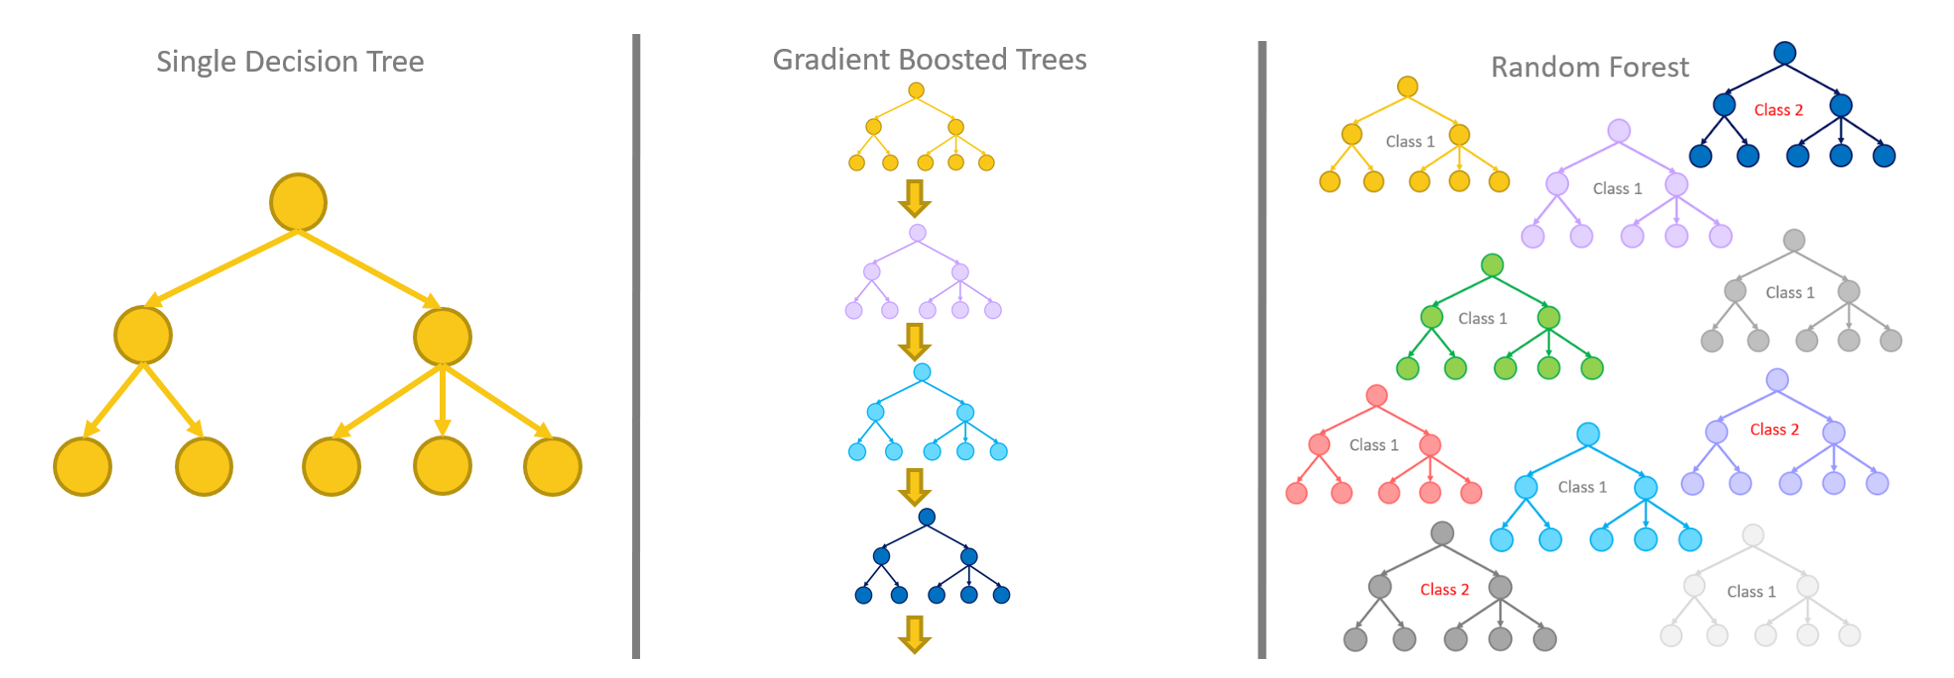

# Зачем нужен градиентный бустинг?

Он отлично работает на выборках с «табличными», неоднородными данными. Пример таких данных — описание пользователя через его возраст, пол, среднее число поисковых запросов в день, число заказов такси и так далее. Такой бустинг способен эффективно находить нелинейные зависимости в данных различной природы. Не так хорошо бустинг проявляет себя на однородных данных: текстах, изображениях, звуке, видео. В таких задачах нейросетевые подходы почти всегда демонстрируют лучшее качество.

# Освежим в памяти градиентный спуск



*   Минимизируем функцию $f(x)$
*   Выбираем $x_0 - $ начальное приближение
*   Пусть $x_n - $ текущая найденная точка
*   Вычисляем градиент (производную) $f'(x_n)$
*   Вычисляем следующее приближение:  
$\hspace{1cm}x_{n+1} = x_n - \alpha f'(x_n), \alpha - $темп обучения (learning rate)




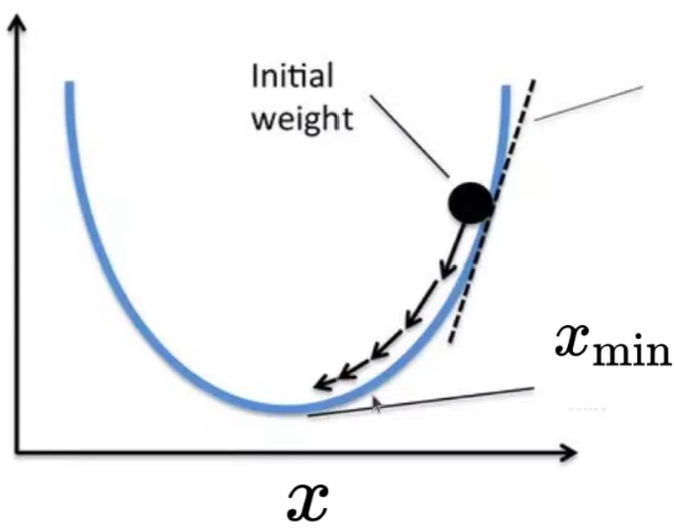

# Постановка задачи

Имеем:



* $X = \{ x^1, x^2, \ldots, x^l \} - $ обучающая выборка

* $y = \{ y^1, y^2, \ldots, y^l \} - $ целевая переменная (действительное число)

Необходимо построить алгоритм $a(x)$, оптимизирующий функцию потерь
   $$Q(y,a) = \frac{1}{l} \sum_{i=1}^{l} {L}(y^i, a(x^i))$$

Пример квадратичной функции потерь
                   $$L(y,a) = (a - y)^2$$



# Построение композиции



*   Пусть уже построены $a_1, a_2, \ldots, a_k$, а также константы $c_1, c_2, \ldots, c_k$
*   Необходимо построить $a_{k+1}$
*   Запишем функцию потерь для одного объекта

$$L(y^i,a(x^i)) = L(y^i,\underbrace{ c_1a_1(x^i) + \ldots + c_ka_k(x^i)}_{\text{Построено}} + \underbrace{c_{k+1}a_{k+1}(x^i)}_{\text{Нужно построить}})$$       
  
  $$ \hspace{5cm}f( \hspace{3cm}  t \hspace{1cm} +\hspace{2.5cm} \Delta{t}) \rightarrow \underset{t}{\min}$$

  $$\Delta{t} = -\alpha f'(t)$$

  $$a_{k+1}(x^i):=-L'_a(y^i,a)|_{a=c_1a_1(x^i) + \ldots + c_ka_k(x^i)}$$

# Построение очередного дерева

Для данного объекта:
$$a_{k+1}(x^i):=\underbrace{-L'_a(y^i,a)|_{a=c_1a_1(x^i) + \ldots + c_ka_k(x^i)}}_{\text{новая целевая пременная}}$$

Для нескольких объектов: решаем новую задачу машинного обучения, где $k+1$ - ое дерево "настраивается" по направлению антиградиента функции потерь.

Константа в бустинге выбирается так же, как и в градиентном спуске.

# Градиентный бустинг для MSE

Антиградиент функции потерь для MSE:
$$-L'_a(y^i,a)|_{a=c_1a_1(x^i) + \ldots + c_ka_k(x^i)} = -2(a-y^i)|_{a=c_1a_1(x^i) + \ldots + c_ka_k(x^i)} = -2(c_1a_1(x^i) + \ldots + c_ka_k(x^i)-y^i)$$


**Вывод.** В случае MSE алгоритм градиентного бустинга настраивается на разность ответа и текущего приближения:
 $$a_{k+1}(x^i) = -2(c_1a_1(x^i) + \ldots + c_ka_k(x^i)-y^i)$$

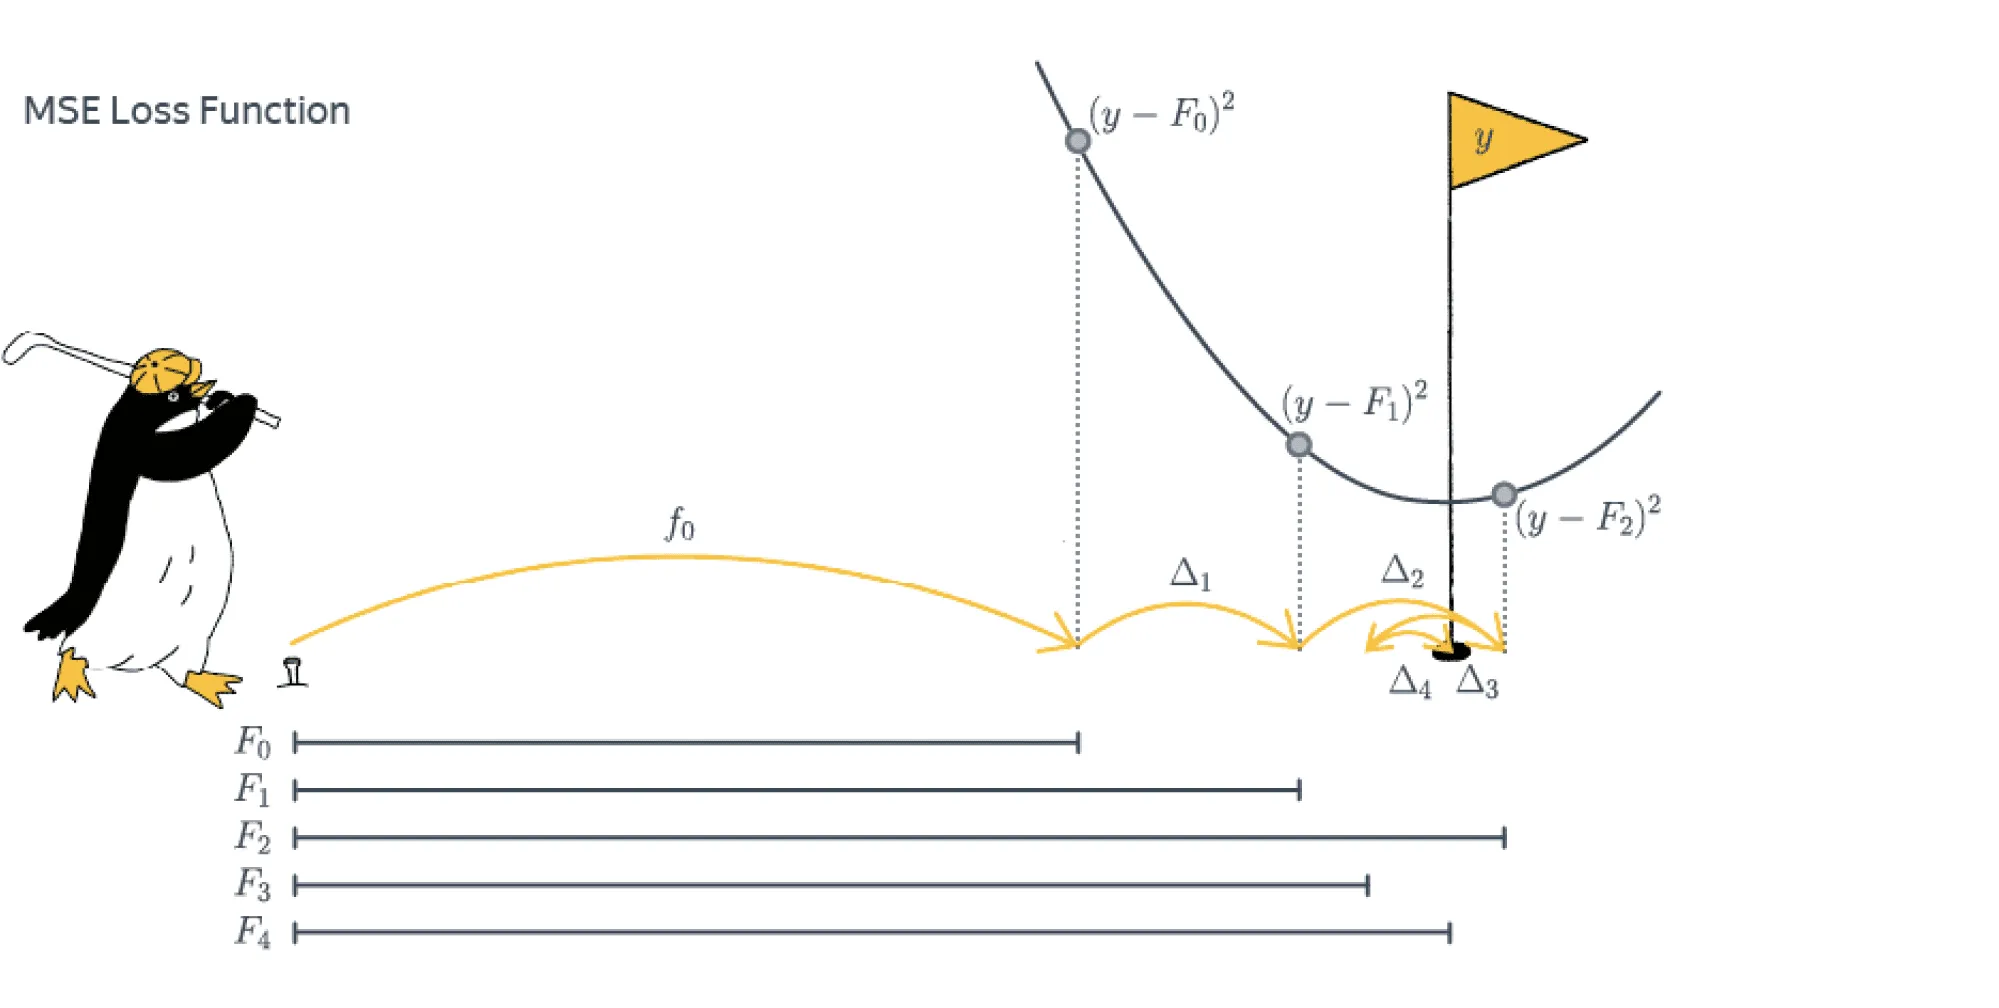

# Темп обучения (learning rate)

Обучение композиции с помощью градиентного бустинга может привести к переобучению, если базовые алгоритмы слишком сложные. Например, если сделать решающие деревья слишком глубокими (более 10 уровней), то при обучении бустинга ошибка на обучающей выборке даже при довольно скромном $k$ может приблизиться к нулю, то есть предсказание будет почти идеальным, но на тестовой выборке всё будет плохо.

Существует два решения этой проблемы.



*   Во-первых, необходимо упростить базовую модель, уменьшив глубину дерева (либо примерив какие-либо ещё техники регуляризации).

*   Во-вторых, мы можем ввести параметр, называемый **темпом обучения (learning rate)** $ c_i \in (0,1]  $:


$\hspace{8cm}a(x) = c_1a_1(x) + \ldots + c_ka_k(x)+c_{k+1}a_{k+1}$.


Значение параметра обычно определяется эмпирически по входным данным. В библиотеке CatBoost темп обучения может быть выбран автоматически по набору данных. Для этого используется заранее обученная линейная модель, предсказывающая темп обучения по мета-параметрам выборки данных: числу объектов, числу признаков и другим.

Темп обучения связан с количеством итераций градиентного бустинга. Чем меньше learning rate, тем больше итераций потребуется сделать для достижения того же качества на обучающей выборке.




# Реализации градиентного бустинга

**LightGBM**

LightGBM строит деревья по принципу: **«На каждом шаге делим вершину с наилучшим скором»**, а основным критерием остановки выступает максимально допустимое количество вершин в дереве. Это приводит к тому, что деревья получаются несимметричными, то есть поддеревья могут иметь разную глубину — например, левое поддерево может иметь глубину 2, а правое может разрастись до глубины 15.

С одной стороны, это позволяет быстро подогнаться под обучающие данные. С другой — бесконтрольный рост дерева в глубину неизбежно ведет к переобучению, поэтому LightGBM позволяет помимо количества вершин ограничивать и максимальную глубину. Впрочем, это ограничение обычно все равно выше, чем для XGBoost и CatBoost.

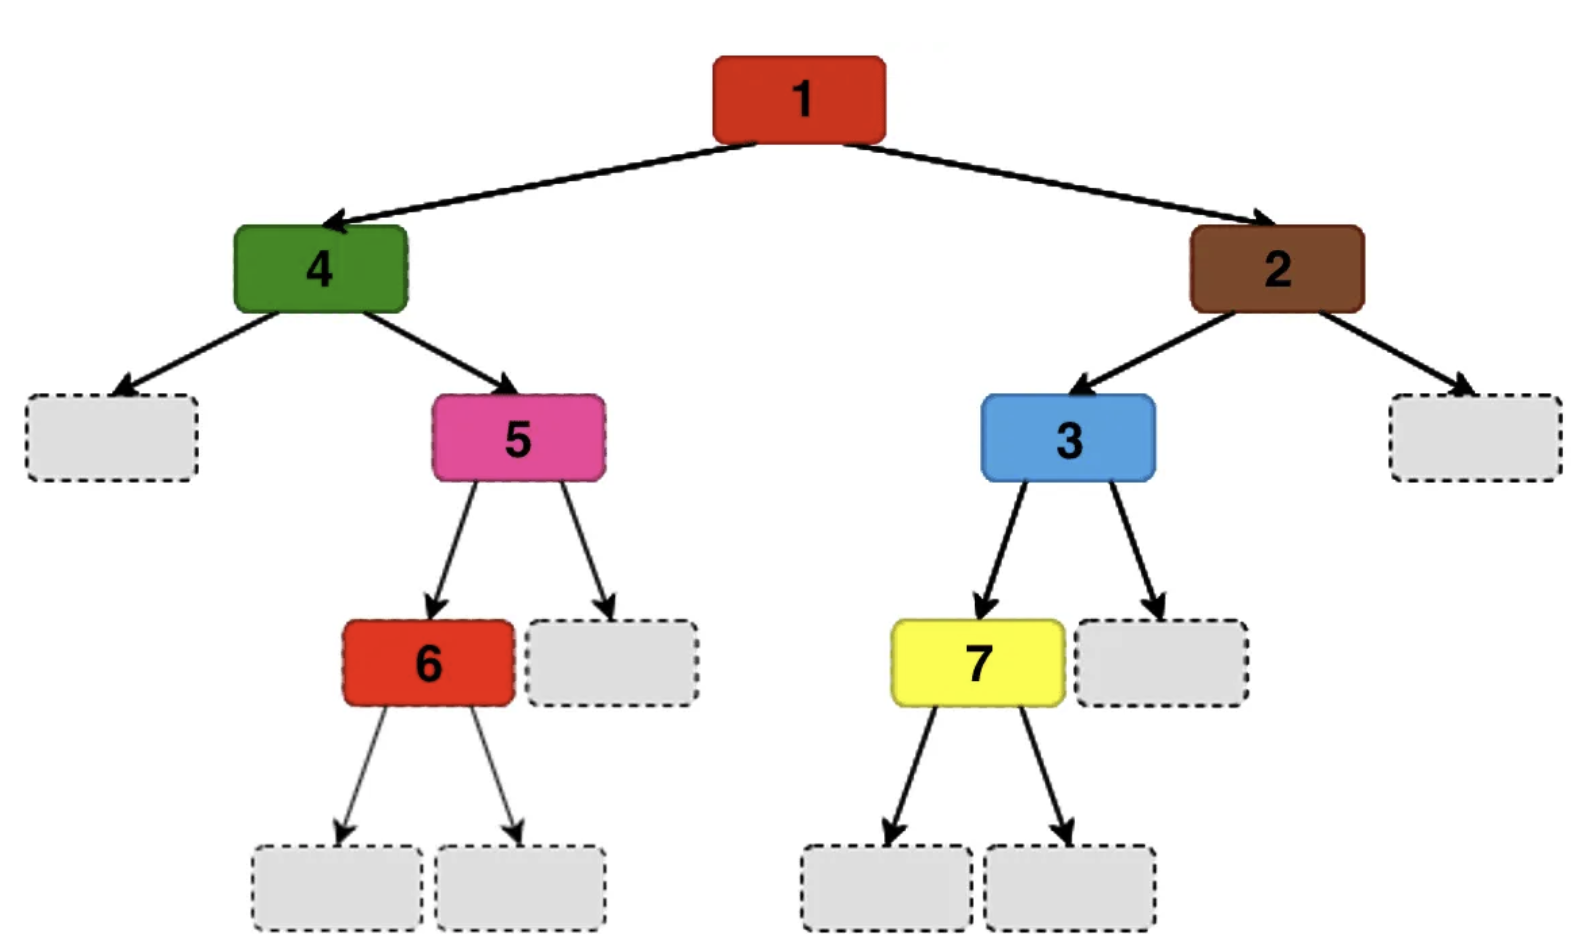

**XGBoost**

XGBoost строит деревья по принципу: **«Строим дерево последовательно по уровням до достижения максимальной глубины»**. Отдельного ограничения на количество вершин нет, так как оно естественным образом получается из ограничения на глубину дерева. В XGBoost деревья «стремятся» быть симметричными по глубине, и в идеале получается полное бинарное дерево, если это не противоречит другим ограничениям (например, ограничению на минимальное количество объектов в листе). Такие деревья обычно являются более устойчивыми к переобучению.

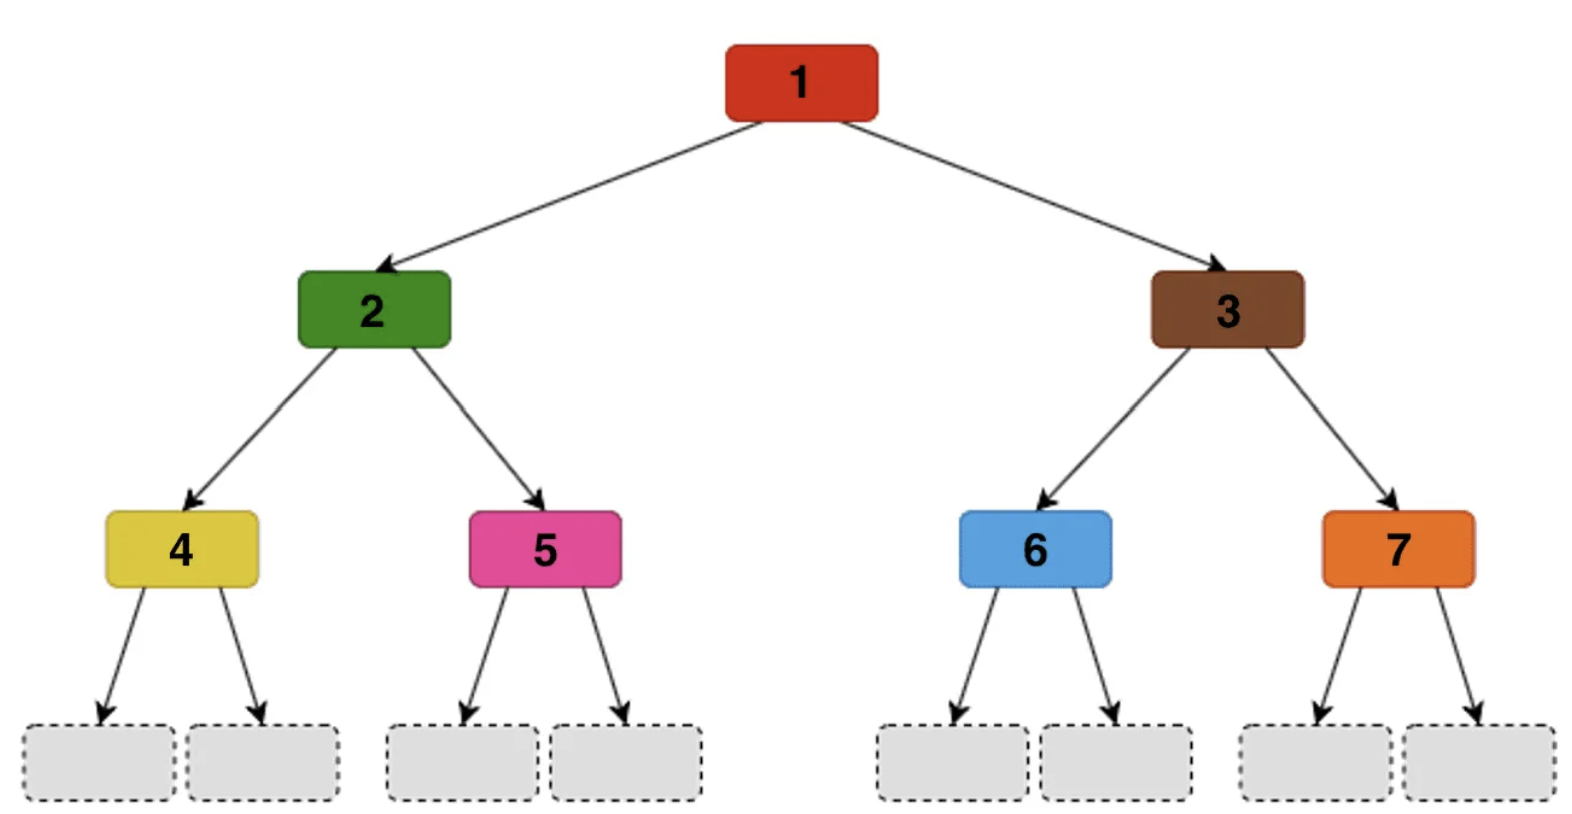

**CatBoost**

CatBoost строит деревья по принципу: **«Все вершины одного уровня имеют одинаковый предикат»**. Одинаковые сплиты во всех вершинах одного уровня позволяют избавиться от ветвлений (конструкций if-else) в коде инференса модели с помощью битовых операций и получить более эффективный код, который в разы ускоряет применение модели, в особенности в случае применения на батчах.

Кроме этого, такое ограничение на форму дерева выступает в качестве сильной регуляризации, что делает модель более устойчивой к переобучению. Основной критерий остановки, как и в случае XGBoost, — ограничение на глубину дерева. Однако, в отличие от XGBoost, в CatBoost всегда создаются полные бинарные деревья, несмотря на то, что в некоторые поддеревья может не попасть ни одного объекта из обучающей выборки.

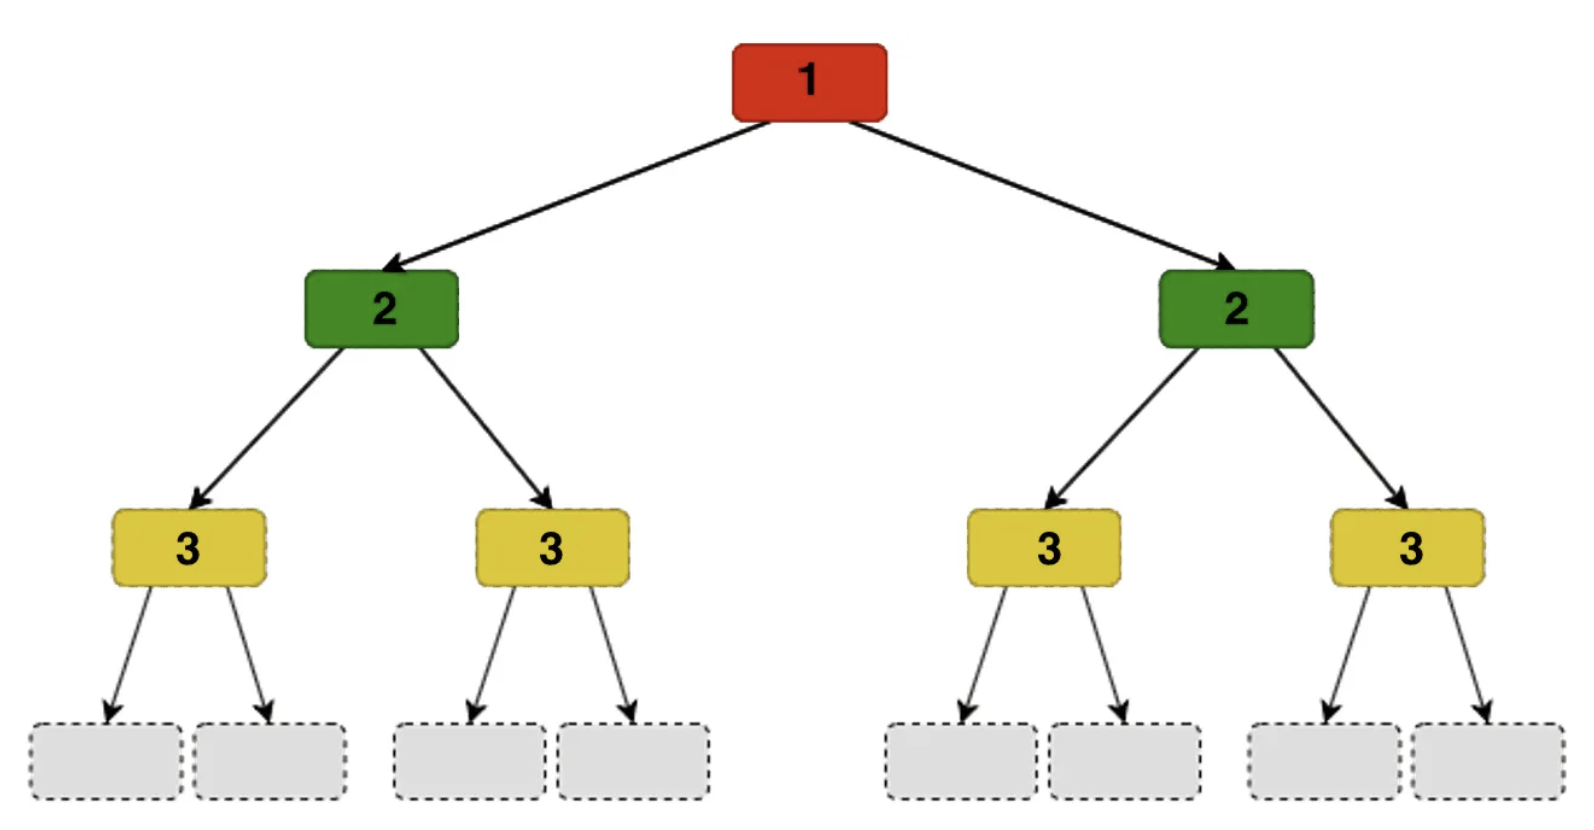

# Бустинг: преимущества и недостатки

**Преимущества:**


*   Позволяет очень точно восстанавливать искомую функцию
*   Почти не переобучается
*   По сравнению с Random Forest, способен компенсировать систематическую ошибку каждого из базовых алгоритмов, а не накапливает их
*   Работает с произвольной функцией потерь в задаче классификации, регрессии, ранжирования, ...

**Недостатки:**

*   Медленный
*   Плохо интерпретируемый
*   Переобучение на выбросах при избыточном количестве алгоритмов
*   Нужна довольно большая обучающая выборка









## Примеры применения алгоритмов градиентного бустинга на практике

In [ ]:
#Скачиваем нужные библиотеки
!pip install xgboost
!pip install lightgbm
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

Для обучения моделей будет использован **Glass Classification** датасет, где необходимо верно определить тип стекла по его признакам. В случае регрессии используется **Diabetes** датасет из **scikit-learn.**

In [ ]:
df_path = "Downloads/glass.csv"
glass_df = pd.read_csv(df_path)
X1, y1 = glass_df.iloc[:, :-1], glass_df.iloc[:, -1]
y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)
print(glass_df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [ ]:
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

Также стоит отметить, что в **scikit-learn** есть особая версия градиентного бустинга — **HistGradientBoosting** на основе **LightGBM**, предназначенная для работы с большими наборами данных, которая отрабатывает гораздо быстрее и чаще лучше, чем классический градиентный бустинг.

# GradientBoostingClassifier (scikit-learn)

In [ ]:
sk_gbc = GradientBoostingClassifier(random_state=0)
sk_gbc.fit(X1_train, y1_train)
sk_gbc_pred_res = sk_gbc.predict(X1_test)
sk_gbc_accuracy = accuracy_score(y1_test, sk_gbc_pred_res)
print(f'sk_gbc accuracy: {sk_gbc_accuracy}')
print(sk_gbc_pred_res)

sk_gbc accuracy: 0.6666666666666666
[5 0 1 4 1 1 0 1 1 1 1 0 1 1 1 5 2 1 2 0 1 0 5 5 0 0 5 0 0 1 0 0 1 0 1 0 0
 0 0 5 1 1 1 0 1 1 0 1 0 1 0 1 5 0]


# HistGradientBoostingClassifier (scikit-learn)

In [ ]:
sk_hist_gbc = HistGradientBoostingClassifier(random_state=0)
sk_hist_gbc.fit(X1_train, y1_train)
sk_hist_gbc_pred_res = sk_hist_gbc.predict(X1_test)
sk_hist_gbc_accuracy = accuracy_score(y1_test, sk_hist_gbc_pred_res)
print(f'sk_hist_gbc accuracy: {sk_hist_gbc_accuracy}')
print(sk_hist_gbc_pred_res)

sk_hist_gbc accuracy: 0.7407407407407407
[5 0 1 4 1 1 0 1 1 1 0 1 0 1 1 5 2 1 0 2 3 0 5 5 0 0 5 0 1 1 0 0 1 0 0 0 0
 2 0 5 1 4 1 0 0 1 0 1 0 1 0 1 5 0]


# LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor

lgb_clf = LGBMClassifier(random_state=0, verbose=-1)
lgb_clf.fit(X1_train, y1_train)
lgb_clf_pred_res = lgb_clf.predict(X1_test)
lgb_clf_accuracy = accuracy_score(y1_test, lgb_clf_pred_res)
print(f'lgb_clf accuracy: {lgb_clf_accuracy}')
print(lgb_clf_pred_res)

lgb_clf accuracy: 0.7407407407407407
[5 0 1 4 1 1 0 1 1 1 0 0 0 1 1 5 2 1 2 2 3 1 5 5 0 0 5 0 1 1 0 0 1 0 0 0 0
 0 0 5 1 4 1 0 0 1 0 1 0 1 0 1 5 0]


# XGBClassifier

In [ ]:
from xgboost import XGBClassifier, XGBRegressor

xgbc = XGBClassifier(seed=0)
xgbc.fit(X1_train, y1_train)
xgbc_pred_res = xgbc.predict(X1_test)
xgbc_accuracy = accuracy_score(y1_test, xgbc_pred_res)
print(f'xgbc accuracy: {xgbc_accuracy}')
print(xgbc_pred_res)

xgbc accuracy: 0.6851851851851852
[5 0 1 4 1 1 0 1 1 1 3 0 1 1 1 5 2 1 1 2 3 0 5 5 0 0 5 0 0 1 0 0 1 0 0 0 0
 0 0 5 1 4 1 0 1 1 0 1 0 1 0 1 5 0]


# CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor

cb_clf = CatBoostClassifier(random_seed=0, logging_level='Silent')
cb_clf.fit(X1_train, y1_train)
cb_clf_pred_res = cb_clf.predict(X1_test).squeeze()   # remove all single-dimensional entries
cb_clf_accuracy = accuracy_score(y1_test, cb_clf_pred_res)
print(f'cb_clf accuracy: {cb_clf_accuracy}')
print(cb_clf_pred_res)

cb_clf accuracy: 0.6851851851851852
[5 0 1 4 1 1 0 1 1 1 0 0 1 1 1 5 2 1 2 2 1 0 5 1 0 0 5 0 1 1 0 0 1 0 0 0 0
 0 0 5 1 5 1 0 1 1 0 1 0 1 0 1 5 0]


# GradientBoostingRegressor (scikit-learn)

In [ ]:
sk_gbr = GradientBoostingRegressor(random_state=0)
sk_gbr.fit(X2_train, y2_train)
sk_gbr_pred_res = sk_gbr.predict(X2_test)
sk_mape = mean_absolute_percentage_error(y2_test, sk_gbr_pred_res)
print(f'sk_gbr mape: {sk_mape}')
print(sk_gbr_pred_res)

sk_gbr mape: 0.4010647096251489
[255.26058697 236.87383554 189.22369747 111.4291292  195.31958776
 249.2293251   97.46956406 205.91110801 133.47952304 240.88679883
 187.19018483 171.09963906 132.63933991  86.28964353 286.56077589
 105.78347251 161.94686043  72.58069452 105.92470096 236.52718059
 182.08417504 127.93036968 164.16563703 147.68681371 229.72747212
 194.16656023 142.44300193  68.79177464 237.21638657 163.36730299
 223.14955275  85.82843049 122.42781509 153.99332065 133.44848601
 159.00754731 151.98981608 147.1238119   88.56372077 200.84785209
 117.71059889 157.60108633 137.94395538 173.39402287 176.29284757
  62.85019316 109.646804   124.14982054  83.45697583 266.40618239
 141.2307366   42.05033124 163.57898214 149.92213387 230.37326368
 226.98842404 176.95426024 128.73302071  94.7641018  180.13853236
 242.31821245 147.52903035 131.71442058  97.32617479 246.70709949
 155.26338705  88.36785447 243.39330218 215.93042351  54.04270734
  87.76236479 138.21222825 101.23449416 140.

# HistGradientBoostingRegressor (scikit-learn)

In [ ]:
sk_hist_gbr = HistGradientBoostingRegressor(random_state=0)
sk_hist_gbr.fit(X2_train, y2_train)
sk_hist_gbr_pred_res = sk_hist_gbr.predict(X2_test)
sk_hist_mape = mean_absolute_percentage_error(y2_test, sk_hist_gbr_pred_res)
print(f'sk_hist_gbr mape: {sk_hist_mape}')
print(sk_hist_gbr_pred_res)

sk_hist_gbr mape: 0.39301688868165796
[264.59007545 243.59190524 180.62442773 108.53165744 195.17695513
 258.1710931  112.67894454 239.18006052 144.50027011 244.02461776
 180.19087697 171.2628973  142.6966707   94.26236013 301.44493762
  90.25622203 154.82566511  75.43291346  96.36987316 230.14565012
 196.50928346 134.41863815 167.28719774 118.51218378 209.75431111
 176.46248808 113.40188129  68.47515467 248.57638999 116.15751993
 195.54397416  59.94733366 153.03012884 165.84819847 135.95402508
 133.54279177 190.26058998 153.08963938  86.65214731 185.07312005
 110.00197459 142.99434304 111.32566034 205.63519803 163.76035901
  68.26003406 118.15074567 101.01137587  57.54356002 247.29839792
 140.32714196  41.87878548 149.89720974 189.08931404 251.48016218
 175.76119949 160.38118455 110.76716142 107.00114228 154.75409577
 256.3194536  148.8935956  119.32752592  78.65118163 252.18315433
 122.833807    92.10033912 219.56310647 199.35553751  87.27114699
  78.83529151 114.14943246  86.0743350

# LGBMRegressor

In [ ]:
lgb_reg = LGBMRegressor(random_state=0, verbose=-1)
lgb_reg.fit(X2_train, y2_train)
lgb_reg_pred_res = lgb_reg.predict(X2_test)
lgb_reg_mape = mean_absolute_percentage_error(y2_test, lgb_reg_pred_res)
print(f'lgb_reg_mape: {lgb_reg_mape}')
print(lgb_reg_pred_res)

lgb_reg_mape: 0.39864113147931
[261.46864967 223.24674049 179.60231224 104.76984808 197.67529058
 264.26116883 111.11355079 243.72059654 144.18045853 239.08131542
 199.90841705 170.37417433 151.67933516  89.30779664 297.93561211
  96.58862229 162.53285879  70.06113305 108.36436227 234.16276627
 207.7552967  136.83913826 172.38724529 110.26981866 228.1574526
 163.56817258 108.94516511  73.93303203 233.31869769 116.00042252
 195.39846082  72.54403358 164.38943926 194.42418913 130.42154381
 183.04435501 173.56352142 147.00774306  89.07365731 175.25759644
 108.72749406 144.48000593  99.60713604 196.86889512 160.47835096
  60.17798032 133.4909559  115.46543242  64.48286456 251.20520649
 135.52608509  45.16396653 161.70420785 187.28406745 274.21158331
 179.30355071 150.1563969  111.1275583  100.5067047  133.7868607
 269.98464504 159.03980859 118.01578638  75.41625416 249.0569831
 133.99026562 111.43954756 221.81954307 206.02676942  81.56098377
  72.5920367  101.31664062  93.31261471 111.2448

# XGBRegressor

In [ ]:
xgbr = XGBRegressor(seed=0)
xgbr.fit(X2_train, y2_train)
xgbr_pred_res = xgbr.predict(X2_test)
xgbr_mape = mean_absolute_percentage_error(y2_test, xgbr_pred_res)
print(f'xgbr mape: {xgbr_mape}')
print(xgbr_pred_res)

xgbr mape: 0.4341167858276216
[281.3304   241.21165  212.13124  136.89372  144.54208  261.7871
 125.257454 236.16089  199.79964  250.18103  188.50882  126.724464
 161.2112    73.98386  302.50272   97.35103  160.85774   67.10394
  96.0406   284.72873  181.48717  117.764626 182.91393  127.76686
 229.30229  173.58592  170.03932   76.73085  240.7698   117.70699
 224.36049   63.628925 124.27327  142.07358  173.09418  139.11557
 163.61208   92.8561    95.91142  217.65016  112.03522  122.800545
 110.06953  181.34201  159.39062   61.97588  114.534805 145.20259
  84.905815 284.77567  195.29976   45.550606  92.54941  180.4689
 279.12097  241.1343   177.77785  130.43887  159.53189  158.2313
 253.25339  181.86093  120.71679   90.604706 274.5059   140.21674
  92.80314  211.71936  233.20622  110.791824  67.89235  133.62137
 123.05923  102.70884  167.2115   159.32262  131.7305   243.41493
 254.97531  210.0554   130.00981  222.21094   52.864147 251.23187
 118.602684  87.89112  121.147095 218.15724   9

# CatBoostRegressor

In [ ]:
cb_reg = CatBoostRegressor(random_seed=0, logging_level='Silent')
cb_reg.fit(X2_train, y2_train)
cb_reg_pred_res = cb_reg.predict(X2_test)
cb_reg_mape = mean_absolute_percentage_error(y2_test, cb_reg_pred_res)
print(f'cb_reg mape: {cb_reg_mape}')
print(cb_reg_pred_res)

cb_reg mape: 0.39538306365546094
[268.21698587 226.61112865 152.56164473 105.39534082 185.56084388
 231.13386917 112.94031582 246.11217136 121.83631454 238.66069067
 193.92810529 171.53207065 120.95427566  98.87431921 301.0159263
  97.989809   170.68360243  70.03044356 104.9534818  235.1624283
 174.7895105  131.39173163 178.28683674 128.13631321 230.60611298
 186.37090017 131.52230822  61.453026   231.95028492 148.67901568
 186.2317954   80.45908918 137.68617262 171.24445717 128.77648933
 178.31364898 179.17236177 149.82094832 102.25676058 209.48231728
 116.01443961 169.06621701 110.9047463  210.24240477 158.28102362
  72.4532758  135.86931928 121.14865532  76.8103627  278.66222581
 127.85077736  55.25704176 144.51194393 170.06468442 271.51905928
 187.61879537 159.56680649 118.65520621 121.92004997 183.56316238
 248.87847858 137.77180529 117.98743897  82.53109543 255.59388802
 151.23062005  94.00606836 257.15481144 227.21705762  96.77322241
  78.34198817 118.09701594  91.2069645   91.7

# Литература

https://education.yandex.ru/handbook/ml/article/gradientnyj-busting

https://habr.com/ru/articles/799725/

https://youtu.be/JElfEE1OrSU?si=wlo70-sgI6bT1l5I